# Medicare Fraud Dection

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# # %pip install plotly
# import plotly.graph_objects as go
# import plotly.express as px
plt.style.use('classic')  # 'ggplot'
#sns.set_theme(style="whitegrid", palette="summer")
label_font_dict = {'family':"sans-serif", 'size':11, 'color':'black', 'style':'italic'}
title_font_dict = {'family':"sans-serif", 'size':13.5, 'color':'black', 'style':'italic'}

# %pip install missingno
import missingno as msno

from Clean_Function import benef_new_feats, benef_dummy_encode, annotation_with_hue, annotation_without_hue, annotation_index, in_out_null_values, in_new_feats, out_new_feats, benef_group_feats, provider_group_feats, df_group_feats

 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

## Load the dataset:

In [2]:
# Get the training datasets
df_label = pd.read_csv("Data/Train-1542865627584.csv")
df_beneficiary = pd.read_csv("Data/Train_Beneficiarydata-1542865627584.csv")
df_inpatient = pd.read_csv("Data/Train_Inpatientdata-1542865627584.csv")
df_outpatient = pd.read_csv("Data/Train_Outpatientdata-1542865627584.csv")

## Take a Quick Look at the Data Structure

In [3]:
df_label.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


In [4]:
df_beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [5]:
df_inpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_inpatient[df_inpatient['BeneID']=='BENE11001']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_outpatient.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


### 1. Provider lables dataset

In [8]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [9]:
print('Unique providers:', df_label['Provider'].nunique())
print("*" * 40)
print(df_label['PotentialFraud'].value_counts())
print("*" * 40)
print(df_label['PotentialFraud'].value_counts(normalize=True))

Unique providers: 5410
****************************************
No     4904
Yes     506
Name: PotentialFraud, dtype: int64
****************************************
No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64


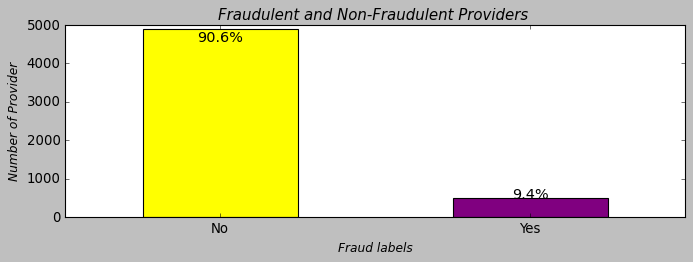

In [10]:
plt.figure(figsize=(10, 3))
fig = df_label['PotentialFraud'].value_counts().plot(kind='bar', color=['yellow','purple'])
# add percentage annotations for each group 
for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/df_label.shape[0],1))+"%"}', (x+width/2,y+height*0.93),
                 ha='center', fontsize=13)
#fig.bar_label(fig.containers[0]) # Display numbers
plt.xlabel('Fraud labels', fontdict=label_font_dict)
plt.xticks(rotation=360)
plt.ylabel('Number of Provider',fontdict=label_font_dict)
plt.title('Fraudulent and Non-Fraudulent Providers ', title_font_dict)


plt.show()

### 2. Beneficiary dataset

In [11]:
df_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

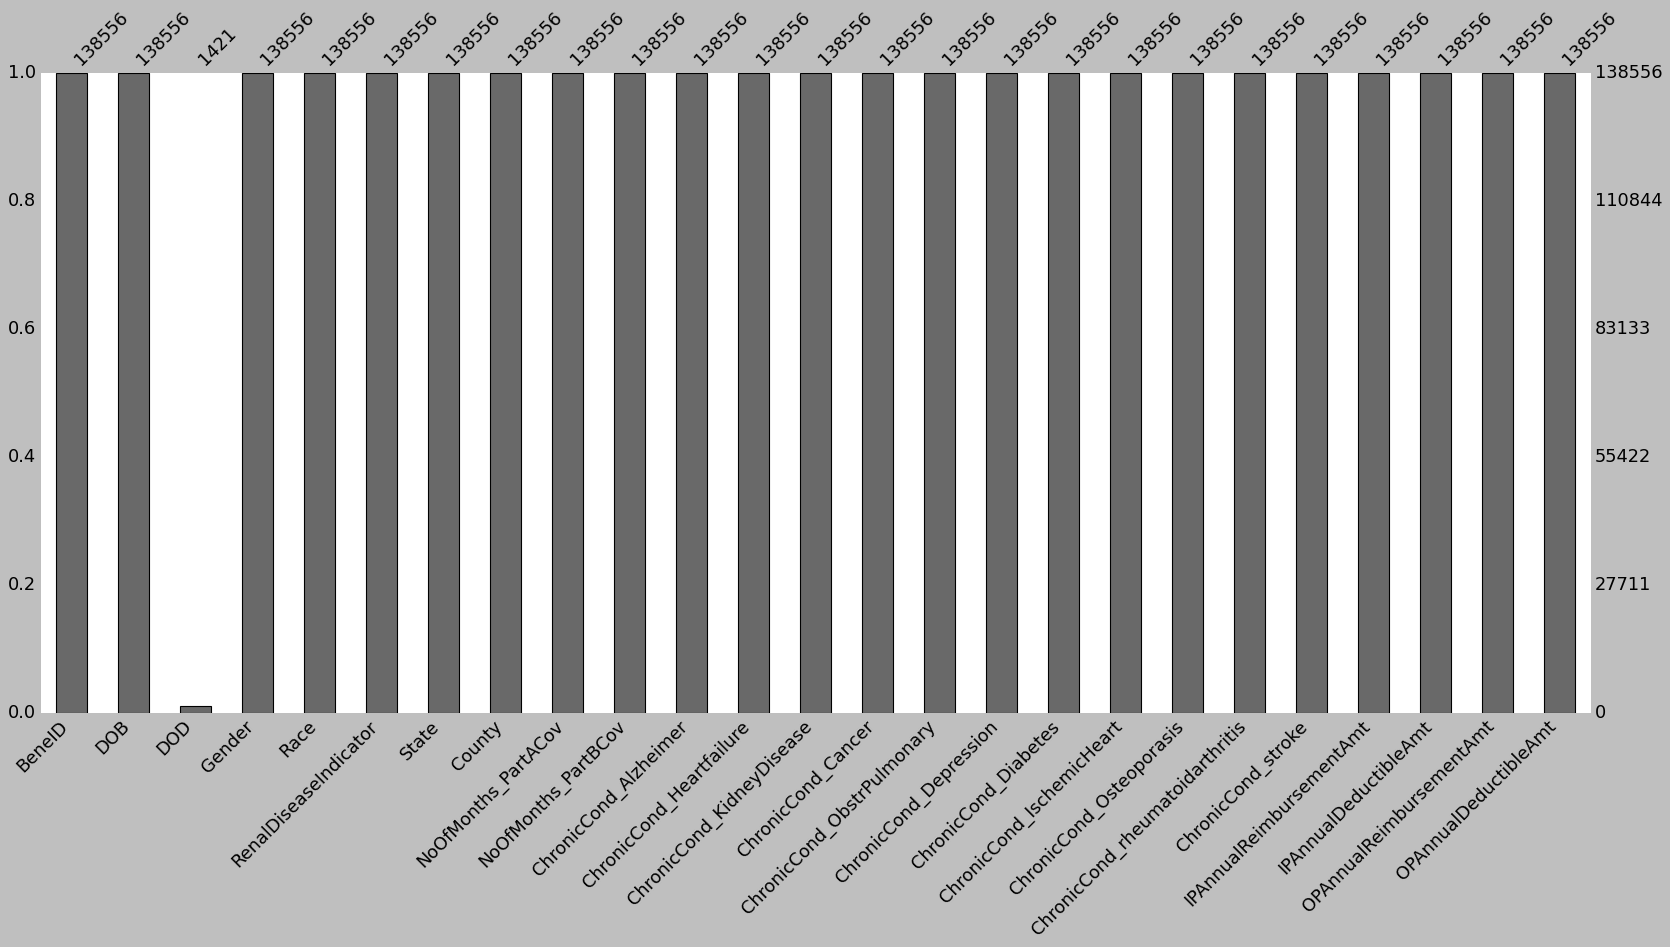

In [12]:
# Visualize the number of missing data
# values as a bar chart
msno.bar(df_beneficiary)
plt.show()

In [13]:
# Check unique values
print('BeneID unique numbers: ', df_beneficiary['BeneID'].nunique())
print('List unique values for the following features')

for col in df_beneficiary.iloc[:,[3,4,5,8,9,10]]:
  print(col+':', df_beneficiary[col].unique())

BeneID unique numbers:  138556
List unique values for the following features
Gender: [1 2]
Race: [1 2 3 5]
RenalDiseaseIndicator: ['0' 'Y']
NoOfMonths_PartACov: [12  0  3  7 10 11  8  4  1  6  2  9  5]
NoOfMonths_PartBCov: [12  0  1  9 11  3 10  8  2  6  4  5  7]
ChronicCond_Alzheimer: [1 2]


In [14]:
# Replace '2' with '0' for Gender Type
df_beneficiary = df_beneficiary.replace({'Gender': 2}, 0)

# Replace 'Y' with 1 for RenalDiseaseIndicator 
df_beneficiary = df_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)
df_beneficiary['RenalDiseaseIndicator'] = df_beneficiary['RenalDiseaseIndicator'].astype('int')

# Replace 2 with 0 for chronic conditions, 0 indicates chronic condition is No
df_beneficiary = df_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                               'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                               'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                               'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

#### Create new features for beneficiary dataset:

- Create Patient age feature from DOB and DOD

- Create Patient If_alive feature from DOD

- Combined Annual reimbursement amounts and Annual deductible amounts for outpatient and inpatient respectively 

In [15]:
benef_new_feats(df_beneficiary)

#### Drop DOB， DOD and IP/OP reimbursement and deductible columns

In [16]:
df_beneficiary.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',
                     'IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'], axis=1, inplace=True)


In [17]:
df_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   Gender                           138556 non-null  int64 
 2   Race                             138556 non-null  int64 
 3   RenalDiseaseIndicator            138556 non-null  int32 
 4   State                            138556 non-null  int64 
 5   County                           138556 non-null  int64 
 6   NoOfMonths_PartACov              138556 non-null  int64 
 7   NoOfMonths_PartBCov              138556 non-null  int64 
 8   ChronicCond_Alzheimer            138556 non-null  int64 
 9   ChronicCond_Heartfailure         138556 non-null  int64 
 10  ChronicCond_KidneyDisease        138556 non-null  int64 
 11  ChronicCond_Cancer               138556 non-null  int64 
 12  ChronicCond_Obst

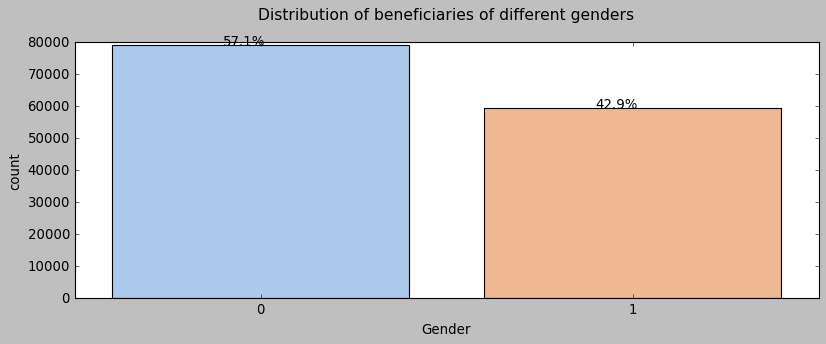

In [18]:
# Percentage of beneficiaries of different genders
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='Gender',y=None, data=df_beneficiary, orient ="v",
                    order = df_beneficiary['Gender'].value_counts().index, 
                    palette= 'pastel')
plt.title('Distribution of beneficiaries of different genders\n ', size = 14)
annotation_without_hue(ax, df_beneficiary.Gender, -0.1,0, 14)
plt.show()

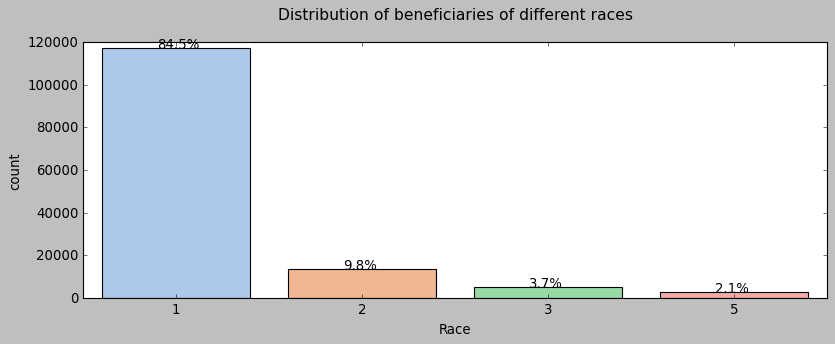

In [19]:
# Percentage of beneficiaries of different races
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='Race',y=None, data=df_beneficiary, orient ="v",
                    order = df_beneficiary['Race'].value_counts().index, 
                    palette= 'pastel')
plt.title('Distribution of beneficiaries of different races\n ', size = 14)
annotation_without_hue(ax, df_beneficiary.Race, -0.1,0, 14)
plt.show()

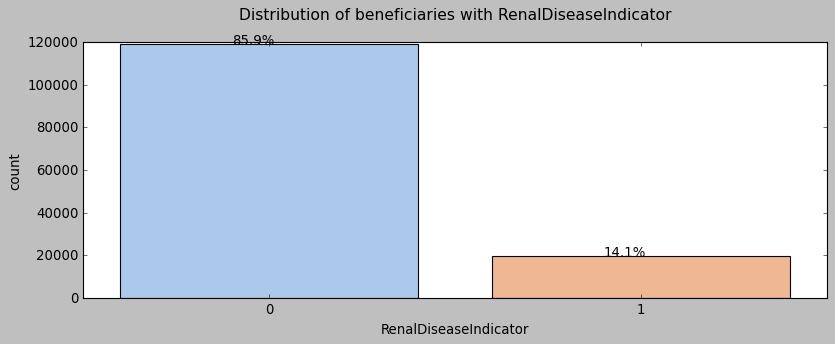

In [20]:
# Percentage of beneficiaries with RenalDiseaseIndicator
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='RenalDiseaseIndicator',y=None, data=df_beneficiary, orient ="v",
                    order = df_beneficiary['RenalDiseaseIndicator'].value_counts().index, 
                    palette= 'pastel')
plt.title('Distribution of beneficiaries with RenalDiseaseIndicator\n ', size = 14)
annotation_without_hue(ax, df_beneficiary.RenalDiseaseIndicator, -0.1,0, 14)
plt.show()

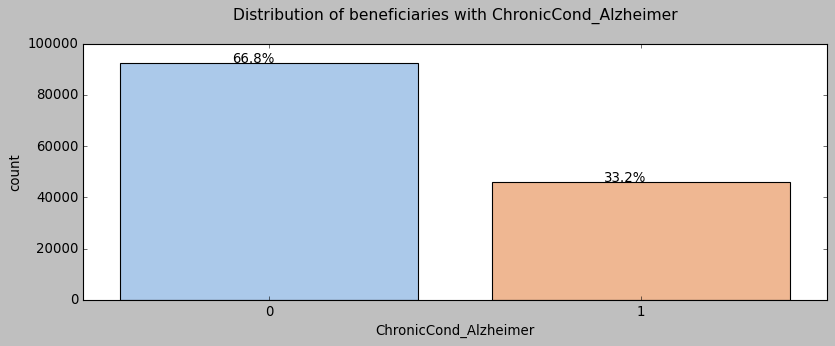

In [21]:
# Percentage of beneficiaries with ChronicCond_Alzheimer
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='ChronicCond_Alzheimer',y=None, data=df_beneficiary, orient ="v",
                    order = df_beneficiary['ChronicCond_Alzheimer'].value_counts().index, 
                    palette= 'pastel')
plt.title('Distribution of beneficiaries with ChronicCond_Alzheimer\n ', size = 14)
annotation_without_hue(ax, df_beneficiary.ChronicCond_Alzheimer, -0.1,0, 14)
plt.show()

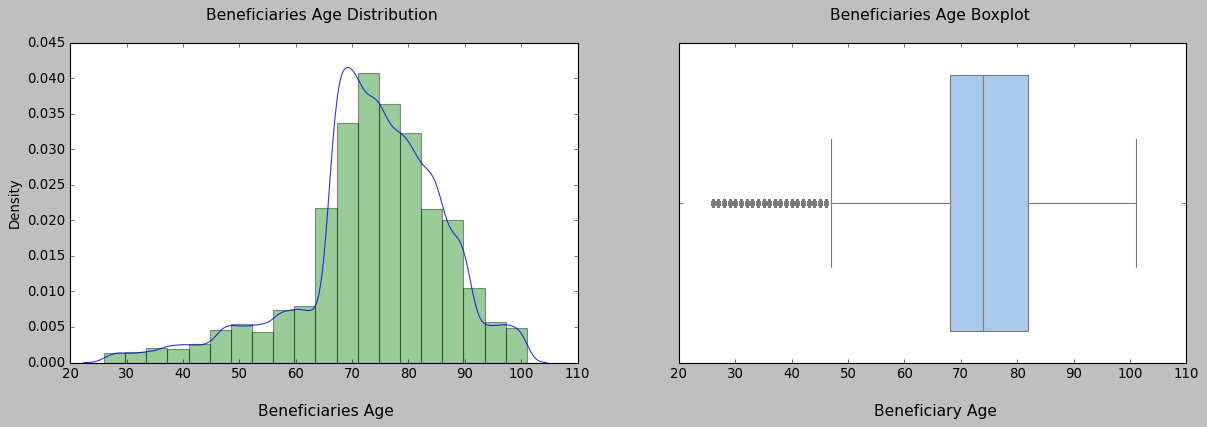

In [22]:
# Distribution of beneficiaries' age 
fig, axes = plt.subplots(1, 2, figsize=(18, 5))


sns.distplot(df_beneficiary['Age'], kde = True, color='green',
             kde_kws={"color": "b", "alpha": 0.8}, bins = 20, ax=axes[0])
axes[0].set_title("Beneficiaries Age Distribution \n",fontsize = 14)
axes[0].set_xlabel("\n Beneficiaries Age", fontsize = 14)

sns.boxplot(x=df_beneficiary['Age'], palette="pastel", ax=axes[1])
axes[1].set_xlabel("\n Beneficiary Age", fontsize = 14)
axes[1].set_title("Beneficiaries Age Boxplot \n", fontsize = 14)
plt.show()

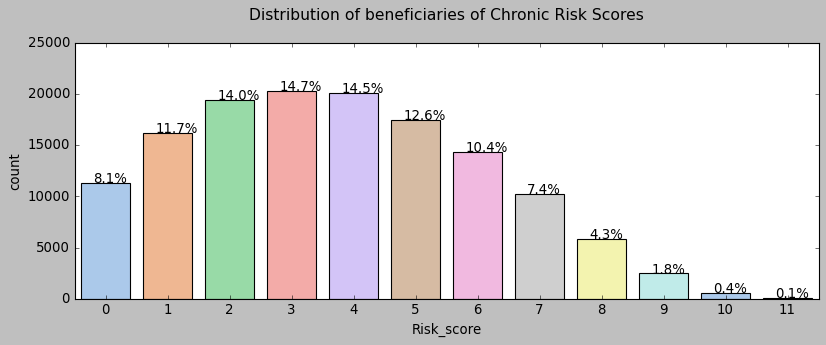

In [23]:
# Distribution of Dead_or_Alive 
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='Risk_score',y=None, data=df_beneficiary, palette= 'pastel') 
#  order = df_beneficiary['Risk_score'].value_counts().index,
plt.title('Distribution of beneficiaries of Chronic Risk Scores\n', size = 14)
annotation_without_hue(ax, df_beneficiary['Risk_score'],-0.2,0, 14)
plt.show()

Text(0.5, 1.0, 'Mean Annual Deductible VS. Risk_score')

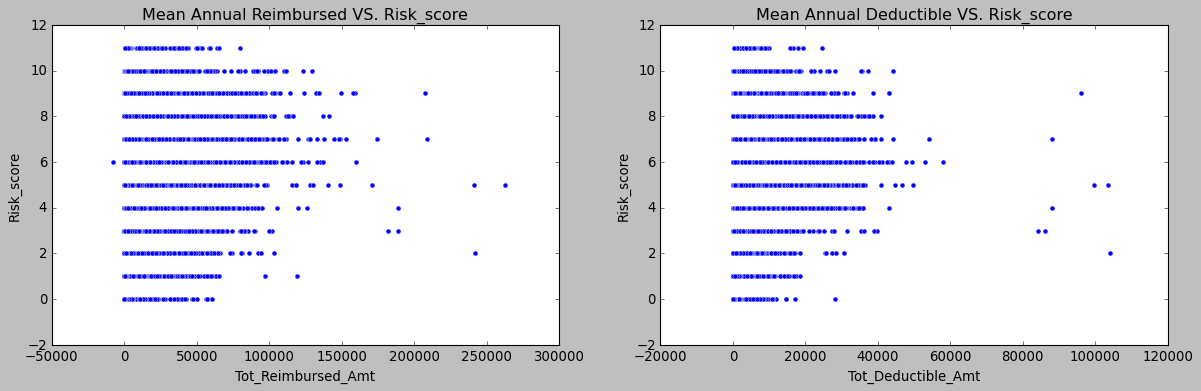

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.scatterplot(ax=axes[0],data=df_beneficiary, x="Tot_Reimbursed_Amt", y="Risk_score")
axes[0].set_title('Mean Annual Reimbursed VS. Risk_score')

sns.scatterplot(ax=axes[1],data=df_beneficiary, x="Tot_Deductible_Amt", y="Risk_score",)
axes[1].set_title('Mean Annual Deductible VS. Risk_score')

In [25]:
#  Check the relationship risk score with Tot_Reimbursed_Amt and Tot_Deductible_Amt
df_risk = df_beneficiary[['Tot_Reimbursed_Amt','Tot_Deductible_Amt','Risk_score']]
df_risk = pd.DataFrame(df_risk.groupby('Risk_score').agg(['max','mean']).reset_index())
df_risk.columns=['Risk_score','Max_Annual_Reimbursed','Mean_Annual_Reimbursed','Max_Annual_Deductible','Mean_Annual_Deductible']
df_risk.head()

,Risk_score,Max_Annual_Reimbursed,Mean_Annual_Reimbursed,Max_Annual_Deductible,Mean_Annual_Deductible
0,0,60250,758.191735,28080,518.906705
1,1,119300,1484.046930,18368,774.203855
2,2,242360,2322.455247,104028,1008.059877
3,3,188650,3394.181952,86228,1280.202115
4,4,188980,4531.176412,88048,1649.005659


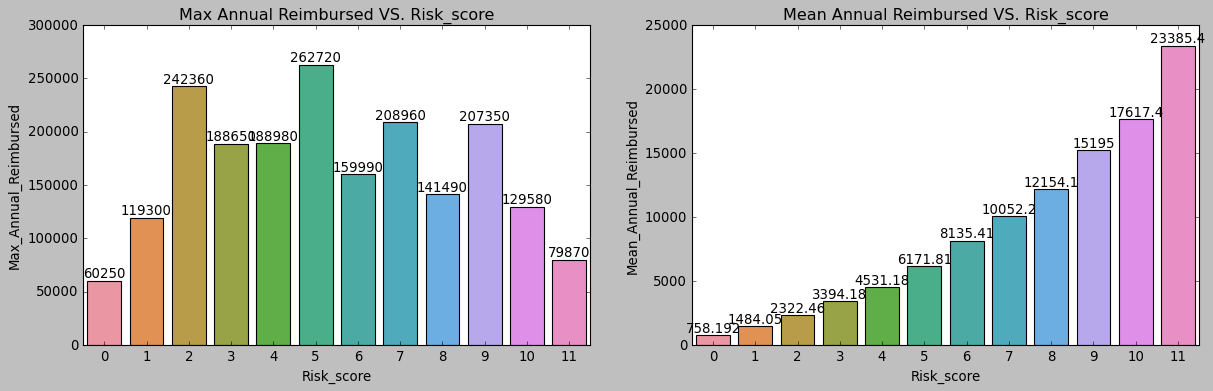

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.barplot(ax=axes[0],data=df_risk,  x="Risk_score", y="Max_Annual_Reimbursed")
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Max Annual Reimbursed VS. Risk_score')

sns.barplot(ax=axes[1],data=df_risk, x="Risk_score", y="Mean_Annual_Reimbursed")
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Mean Annual Reimbursed VS. Risk_score')
plt.show()

In [27]:
#  Check the relationship beneficiaries' Age with Tot_Reimbursed_Amt and Tot_Deductible_Amt
df_age = df_beneficiary[['Tot_Reimbursed_Amt','Tot_Deductible_Amt','Age']]
df_age = pd.DataFrame(df_age.groupby('Age').agg(['max','mean']).reset_index())
df_age.columns=['Age','Max_Annual_Reimbursed','Mean_Annual_Reimbursed','Max_Annual_Deductible','Mean_Annual_Deductible']
df_age.head()

,Age,Max_Annual_Reimbursed,Mean_Annual_Reimbursed,Max_Annual_Deductible,Mean_Annual_Deductible
0,26,47240,4235.520833,19808,1713.125000
1,27,43640,4671.647059,20360,1601.411765
2,28,68300,5440.952381,24160,1711.756614
3,29,96570,4913.254717,23910,1798.235849
4,30,51370,4750.112994,19054,1646.000000


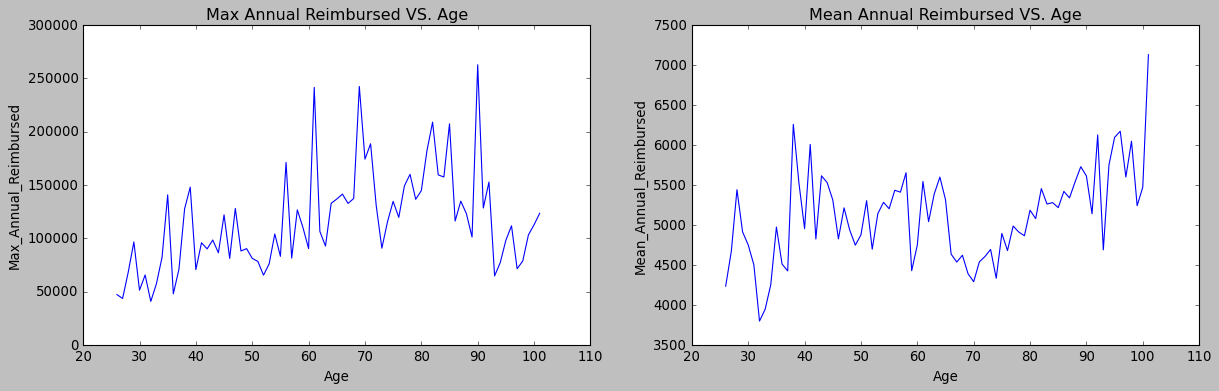

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(ax=axes[0],data=df_age,  x="Age", y="Max_Annual_Reimbursed")
#axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Max Annual Reimbursed VS. Age')

sns.lineplot(ax=axes[1],data=df_age, x="Age", y="Mean_Annual_Reimbursed")
#axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Mean Annual Reimbursed VS. Age')
plt.show()

Text(0.5, 1.0, 'Mean Annual Deductible VS. Age')

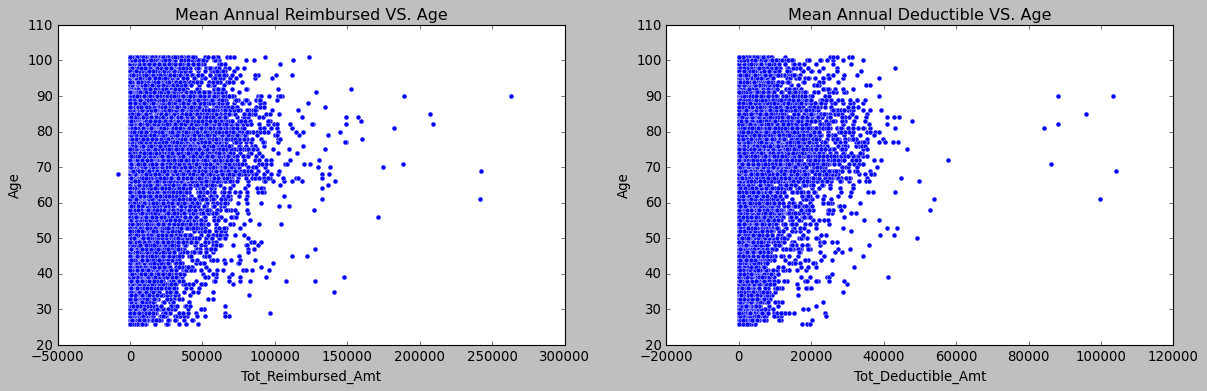

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.scatterplot(ax=axes[0],data=df_beneficiary, x="Tot_Reimbursed_Amt", y="Age")
axes[0].set_title('Mean Annual Reimbursed VS. Age')

sns.scatterplot(ax=axes[1],data=df_beneficiary, x="Tot_Deductible_Amt", y="Age",)
axes[1].set_title('Mean Annual Deductible VS. Age')

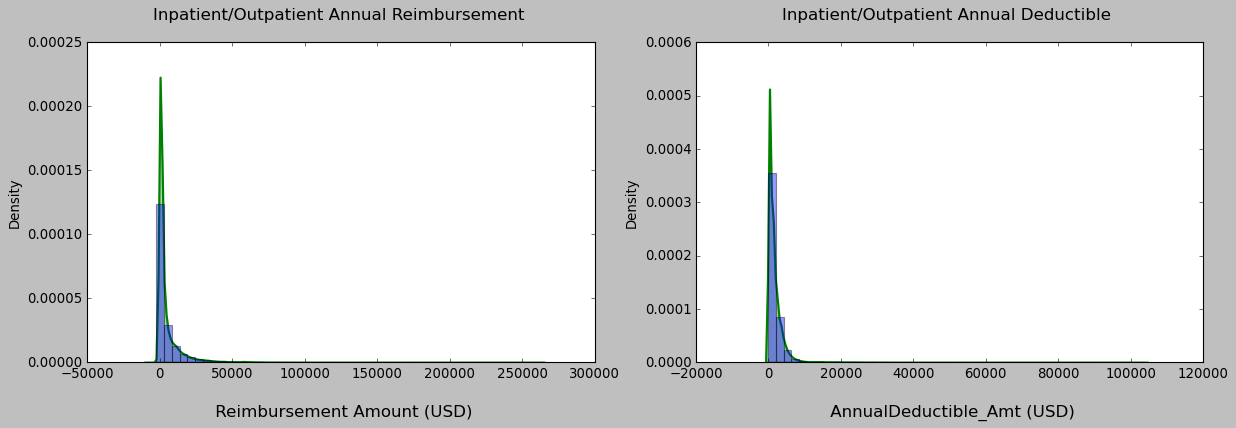

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.distplot(df_beneficiary['Tot_Reimbursed_Amt'],kde=True,
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True}, ax=axes[0]) 
axes[0].set_title("Inpatient/Outpatient Annual Reimbursement \n",fontsize = 15)
axes[0].set_xlabel("\n Reimbursement Amount (USD)", fontsize = 15)

sns.distplot(df_beneficiary['Tot_Deductible_Amt'],kde=True,
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True}, ax=axes[1]) 
axes[1].set_title("Inpatient/Outpatient Annual Deductible \n",fontsize = 15)
axes[1].set_xlabel("\n AnnualDeductible_Amt (USD)", fontsize = 15)

plt.show()

In [31]:
df_beneficiary.loc[df_beneficiary.Tot_Reimbursed_Amt > 200000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,If_Alive,Tot_Reimbursed_Amt,Tot_Deductible_Amt,Risk_score
2500,BENE13669,1,2,0,34,730,12,12,0,1,0,0,0,0,0,1,0,0,0,69,1,242360,104028,2
91564,BENE108968,0,1,0,34,400,12,12,0,1,0,1,1,1,1,1,1,0,0,82,1,208960,88096,7
93621,BENE111157,0,2,0,1,360,12,12,0,1,0,0,1,1,1,1,0,0,0,61,1,241510,99646,5
126846,BENE146654,0,1,0,31,100,12,12,0,0,1,1,1,1,1,1,1,1,1,85,1,207350,95978,9
135300,BENE155688,0,1,0,19,440,12,12,0,1,1,0,0,0,1,1,0,0,1,90,1,262720,103386,5


In [32]:
df_beneficiary.loc[df_beneficiary.Tot_Deductible_Amt > 90000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,If_Alive,Tot_Reimbursed_Amt,Tot_Deductible_Amt,Risk_score
2500,BENE13669,1,2,0,34,730,12,12,0,1,0,0,0,0,0,1,0,0,0,69,1,242360,104028,2
93621,BENE111157,0,2,0,1,360,12,12,0,1,0,0,1,1,1,1,0,0,0,61,1,241510,99646,5
126846,BENE146654,0,1,0,31,100,12,12,0,0,1,1,1,1,1,1,1,1,1,85,1,207350,95978,9
135300,BENE155688,0,1,0,19,440,12,12,0,1,1,0,0,0,1,1,0,0,1,90,1,262720,103386,5


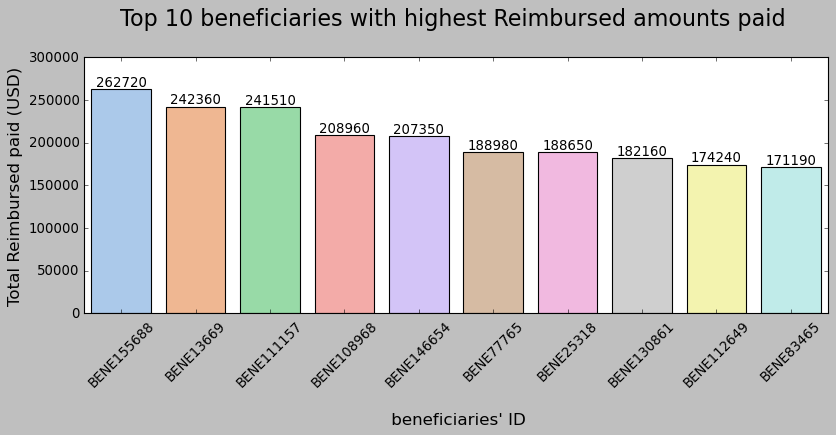

In [33]:
plt.figure(figsize=(12, 4))
top10 = df_beneficiary.sort_values(by=['Tot_Reimbursed_Amt'],ascending=False).head(10)
fig = sns.barplot(data=top10, x='BeneID', y='Tot_Reimbursed_Amt', order=top10['BeneID'], palette='pastel')
fig.bar_label(fig.containers[0]) # Display numbers
#show_values(plot, space=0.05)
plt.xticks(rotation=45)
plt.xlabel("\n beneficiaries' ID", fontsize = 15)
plt.ylabel("Total Reimbursed paid (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with highest Reimbursed amounts paid \n", fontsize = 20)
plt.show()

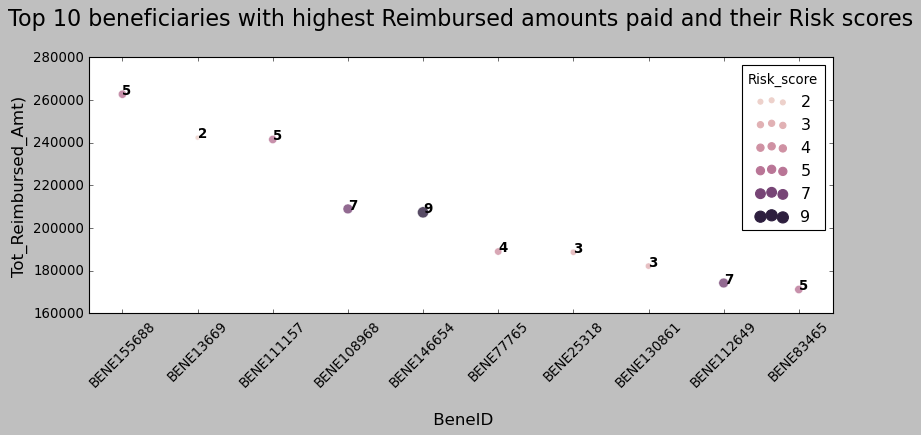

In [34]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=top10,  y="Tot_Reimbursed_Amt", x='BeneID', hue='Risk_score', size = 'Risk_score',
                sizes=(20,100), alpha = 0.8, legend = 'auto')
for line in range(0,top10.shape[0]):
    plt.text(top10.BeneID.iloc[line], top10.Tot_Reimbursed_Amt.iloc[line], top10.Risk_score.iloc[line],
             horizontalalignment='left',
             size='medium', color='black', weight='semibold')
plt.xticks(rotation=45)
plt.xlabel("\n BeneID", fontsize = 15)
plt.ylabel("Tot_Reimbursed_Amt)", fontsize = 15)
plt.title("Top 10 beneficiaries with highest Reimbursed amounts paid and their Risk scores\n", fontsize = 20)
plt.show()

In [35]:
df_beneficiary.sort_values(by=['Tot_Reimbursed_Amt'],ascending=False).head(10)

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,If_Alive,Tot_Reimbursed_Amt,Tot_Deductible_Amt,Risk_score
135300,BENE155688,0,1,0,19,440,12,12,0,1,1,0,0,0,1,1,0,0,1,90,1,262720,103386,5
2500,BENE13669,1,2,0,34,730,12,12,0,1,0,0,0,0,0,1,0,0,0,69,1,242360,104028,2
93621,BENE111157,0,2,0,1,360,12,12,0,1,0,0,1,1,1,1,0,0,0,61,1,241510,99646,5
91564,BENE108968,0,1,0,34,400,12,12,0,1,0,1,1,1,1,1,1,0,0,82,1,208960,88096,7
126846,BENE146654,0,1,0,31,100,12,12,0,0,1,1,1,1,1,1,1,1,1,85,1,207350,95978,9
62365,BENE77765,0,1,0,17,550,12,12,0,0,1,1,1,0,0,1,0,0,0,90,1,188980,88048,4
13375,BENE25318,1,1,0,5,370,12,12,0,1,0,0,0,0,0,1,0,0,1,71,1,188650,86228,3
112038,BENE130861,1,1,0,44,480,12,6,1,0,0,0,0,0,0,1,0,0,1,81,1,182160,84228,3
95013,BENE112649,1,1,1,38,250,12,12,1,1,1,0,1,0,1,1,0,0,1,70,1,174240,20776,7
67669,BENE83465,0,1,1,4,490,12,12,0,1,1,0,0,1,1,1,0,0,0,56,1,171190,29086,5


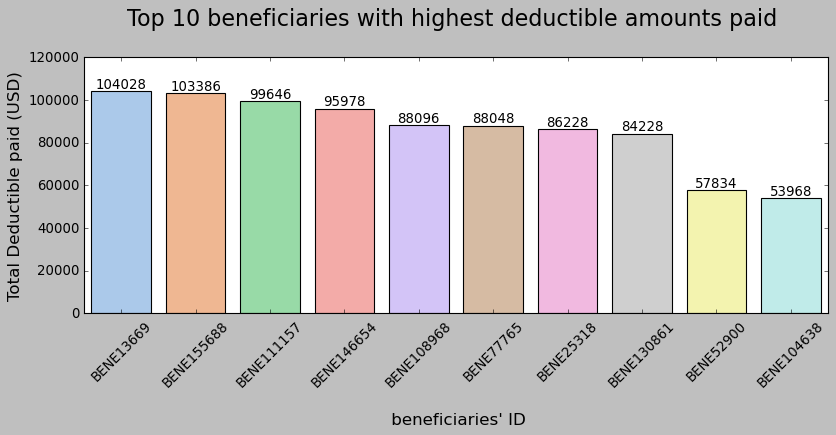

In [36]:
plt.figure(figsize=(12, 4))
top10 = df_beneficiary.sort_values(by=['Tot_Deductible_Amt'],ascending=False).head(10)
fig = sns.barplot(data=top10, x='BeneID', y='Tot_Deductible_Amt', order=top10['BeneID'], palette='pastel')
fig.bar_label(fig.containers[0]) # Display numbers
plt.xticks(rotation=45)
plt.xlabel("\n beneficiaries' ID", fontsize = 15)
plt.ylabel("Total Deductible paid (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with highest deductible amounts paid \n", fontsize = 20)
plt.show()

### 3. inpatient dataset & outpatient dataset

In [37]:
df_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

<AxesSubplot:>

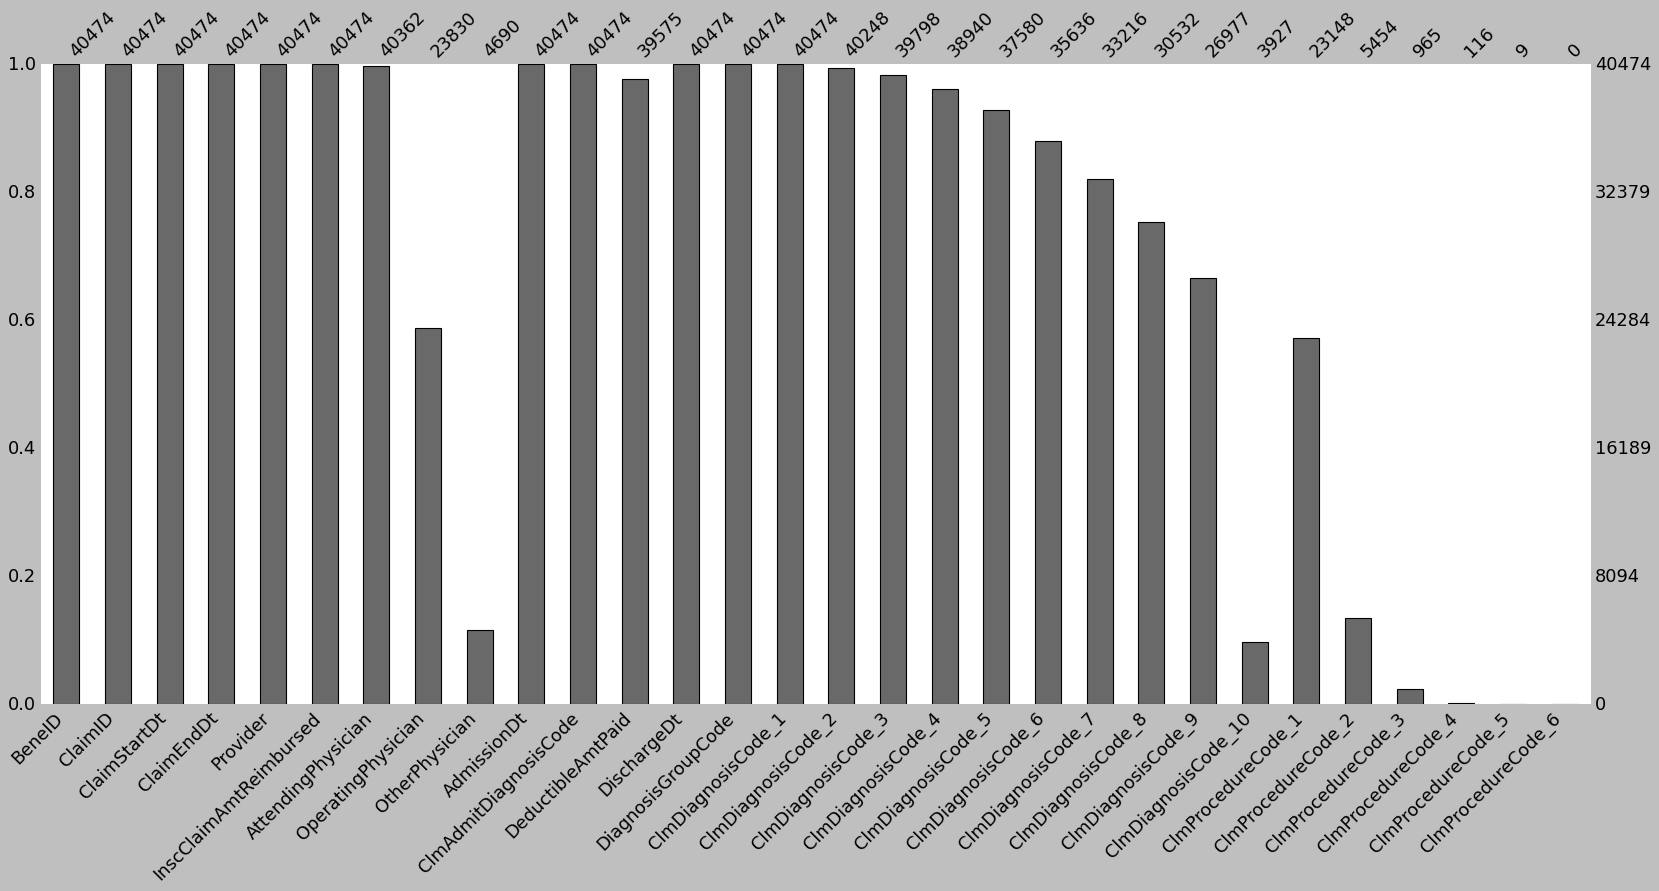

In [38]:
msno.bar(df_inpatient)

- Remove columns with high null values:
- Fill missing values:

In [39]:
in_out_null_values(df_inpatient)

In [40]:
df_inpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
dtype: int64

In [41]:
df_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

<AxesSubplot:>

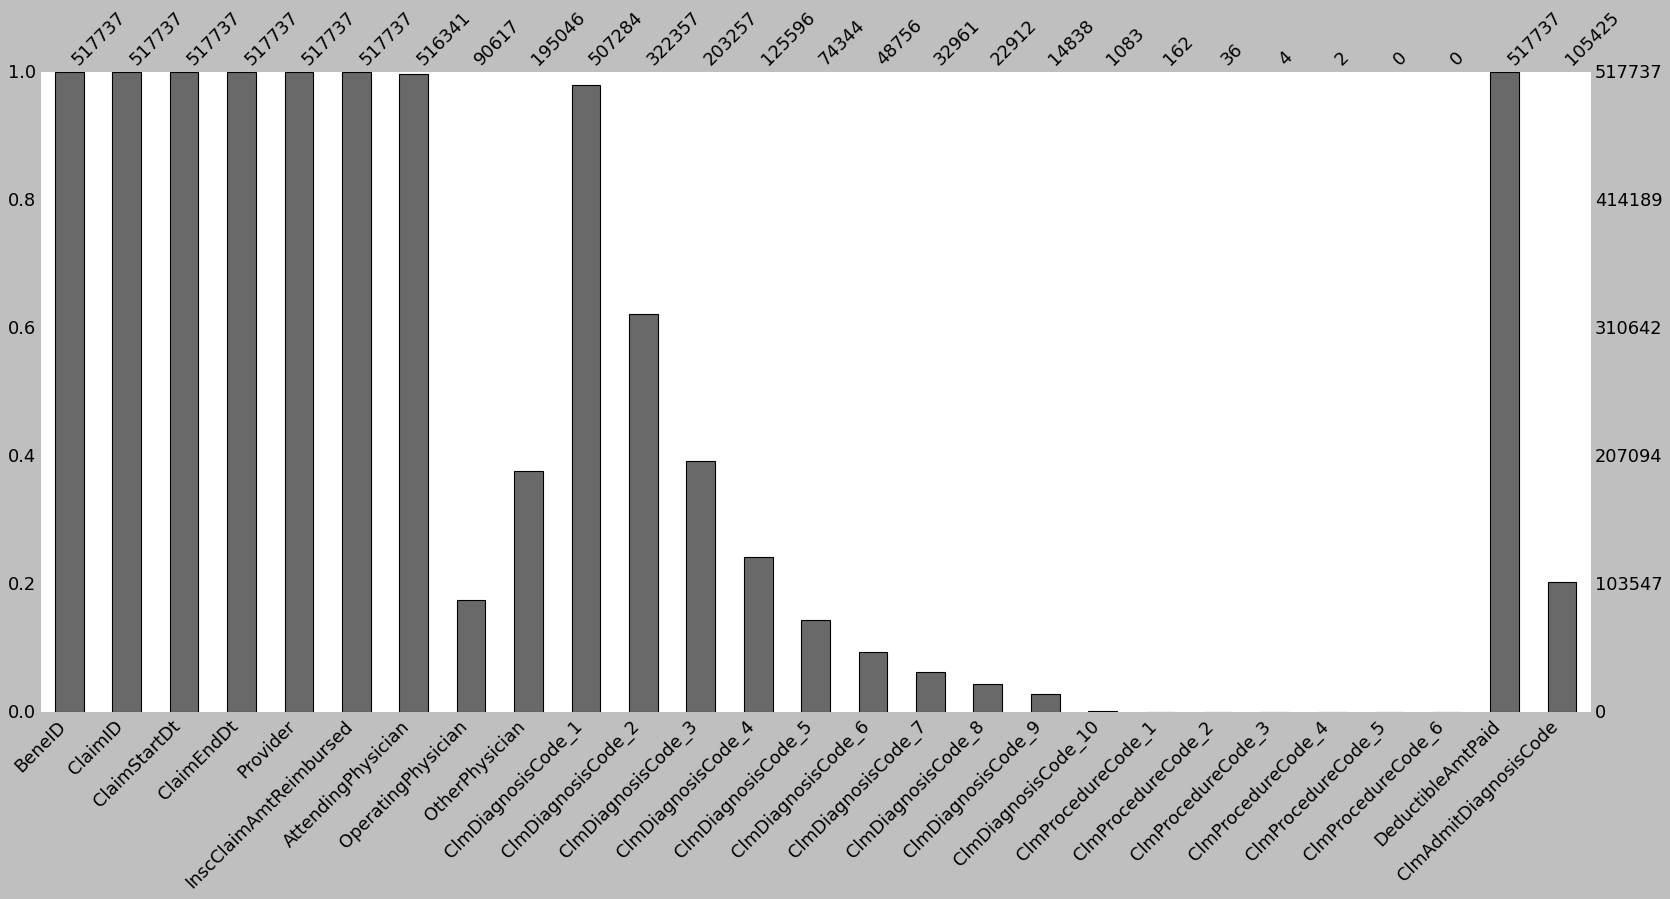

In [42]:
msno.bar(df_outpatient)

- Remove columns with high null values:
- Fill missing values:

In [43]:
in_out_null_values(df_outpatient)

In [44]:
df_outpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

In [45]:
df_inpatient['Provider'].isin(df_outpatient['Provider']).value_counts()

True     36727
False     3747
Name: Provider, dtype: int64

In [46]:
df_outpatient['Provider'].isin(df_inpatient['Provider']).value_counts()

False    298000
True     219737
Name: Provider, dtype: int64

### Observation: 
- Some provider offer both inpatient and out patient services, while some providers only offer only one type of services. When using provder to group up dataset, we need consider different service types that the provider offered.

## Create new features for inpatient/outpatient datasets:
- Create Claim duration from ClaimStartDt and ClaimEndDt
- Create Hospital duration for each claim from AdmissionDt and DischargeDt
- Create claim month and claim year when per beneficiary made claim
- Create a feature calculating total claim amount
- Create if_inpatient feature, inpatient =1, outpatient=0
- Drop ClaimStartDt, ClaimEndDt, AdmissionDt and DischargeDt


In [47]:
in_new_feats(df_inpatient)
out_new_feats(df_outpatient)

In [48]:
df_inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Claim_Duration,Hospital_Duration,Claim_Start_Year,Claim_Start_Month,Total_Claim_Amt,if_inpatient
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,6,6,2009,4,27068.0,1
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,6186,2948,56400,None,None,None,None,None,None,None,7092.0,None,None,2,2,2009,8,6068.0,1
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,None,None,None,None,None,None,None,3,3,2009,9,6068.0,1
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,None,331.0,None,None,8,8,2009,2,6068.0,1
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,None,3893.0,None,None,17,17,2009,8,11068.0,1


In [49]:
print('df_inpatient shape:', df_inpatient.shape)
print('Unique BeneID:', df_inpatient['BeneID'].nunique())
print('Unique ClaimID:', df_inpatient['ClaimID'].nunique())
print('Unique providers:', df_inpatient['Provider'].nunique())

df_inpatient shape: (40474, 29)
Unique BeneID: 31289
Unique ClaimID: 40474
Unique providers: 2092


In [50]:
df_outpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Total_Claim_Amt,if_inpatient
0,BENE11002,CLM624349,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,None,None,None,None,None,None,None,None,None,None,0,56409,0,2009,10,30,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,None,None,6115,None,None,None,None,None,None,None,None,None,None,None,None,0,79380,0,2009,2,80,0
2,BENE11003,CLM438021,PRV57595,10,PHY328821,None,None,2723,None,None,None,None,None,None,None,None,None,None,None,None,0,None,0,2009,6,10,0
3,BENE11004,CLM121801,PRV56011,40,PHY334319,None,None,71988,None,None,None,None,None,None,None,None,None,None,None,None,0,None,0,2009,1,40,0
4,BENE11004,CLM150998,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,None,None,None,None,None,None,None,0,71947,0,2009,1,200,0


In [51]:
print('df_outpatient shape:', df_outpatient.shape)
print('Unique BeneID:', df_outpatient['BeneID'].nunique())
print('Unique ClaimID:', df_outpatient['ClaimID'].nunique())
print('Unique providers:', df_outpatient['Provider'].nunique())

df_outpatient shape: (517737, 27)
Unique BeneID: 133980
Unique ClaimID: 517737
Unique providers: 5012


## Integrate dataset

In [52]:
bene_inpatient = df_inpatient.merge(df_beneficiary, how='inner',left_on='BeneID', right_on='BeneID')
print('bene_inpatient shape:', bene_inpatient.shape)
bene_inpatient.head()

bene_inpatient shape: (40474, 52)


,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Claim_Duration,Hospital_Duration,Claim_Start_Year,Claim_Start_Month,Total_Claim_Amt,if_inpatient,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,If_Alive,Tot_Reimbursed_Amt,Tot_Deductible_Amt,Risk_score
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,6,6,2009,4,27068.0,1,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67,1,36060,3264,7
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,6186,2948,56400,None,None,None,None,None,None,None,7092.0,None,None,2,2,2009,8,6068.0,1,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67,1,36060,3264,7
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,None,None,None,None,None,None,None,3,3,2009,9,6068.0,1,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67,1,36060,3264,7
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,None,331.0,None,None,8,8,2009,2,6068.0,1,0,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,96,1,5250,1318,6
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,None,3893.0,None,None,17,17,2009,8,11068.0,1,0,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,72,1,21380,2256,5


In [53]:
#df_outpatient.rename(columns={'ClmAdmitDiagnosisCode': 'DiagnosisGroupCode'}, inplace=True)
bene_outpatient = df_outpatient.merge(df_beneficiary, how='inner',left_on='BeneID', right_on='BeneID')
print('bene_outpatient shape:', bene_outpatient.shape)
bene_outpatient.head()

bene_outpatient shape: (517737, 50)


,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Total_Claim_Amt,if_inpatient,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,If_Alive,Tot_Reimbursed_Amt,Tot_Deductible_Amt,Risk_score
0,BENE11002,CLM624349,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,None,None,None,None,None,None,None,None,None,None,0,56409,0,2009,10,30,0,0,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,73,1,30,30,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,None,None,6115,None,None,None,None,None,None,None,None,None,None,None,None,0,79380,0,2009,2,80,0,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,73,1,90,90,2
2,BENE11003,CLM438021,PRV57595,10,PHY328821,None,None,2723,None,None,None,None,None,None,None,None,None,None,None,None,0,None,0,2009,6,10,0,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,73,1,90,90,2
3,BENE11004,CLM121801,PRV56011,40,PHY334319,None,None,71988,None,None,None,None,None,None,None,None,None,None,None,None,0,None,0,2009,1,40,0,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,87,1,1810,1810,6
4,BENE11004,CLM150998,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,None,None,None,None,None,None,None,0,71947,0,2009,1,200,0,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,87,1,1810,1810,6


In [54]:
bene_in_out = pd.concat([bene_inpatient, bene_outpatient],axis=0,ignore_index=True)

In [55]:
bene_in_out.head(5)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Claim_Duration,Hospital_Duration,Claim_Start_Year,Claim_Start_Month,Total_Claim_Amt,if_inpatient,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,If_Alive,Tot_Reimbursed_Amt,Tot_Deductible_Amt,Risk_score
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,6,6.0,2009,4,27068.0,1,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67,1,36060,3264,7
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,None,6186,1068.0,750,6186,2948,56400,None,None,None,None,None,None,None,7092.0,None,None,2,2.0,2009,8,6068.0,1,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67,1,36060,3264,7
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,None,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,None,None,None,None,None,None,None,3,3.0,2009,9,6068.0,1,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67,1,36060,3264,7
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,None,331.0,None,None,8,8.0,2009,2,6068.0,1,0,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,96,1,5250,1318,6
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,None,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,None,3893.0,None,None,17,17.0,2009,8,11068.0,1,0,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,72,1,21380,2256,5


In [56]:
bene_in_out.shape

(558211, 52)

In [57]:
df_integ = bene_in_out.merge(df_label, how='inner',left_on='Provider', right_on='Provider')
df_integ.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Claim_Duration,Hospital_Duration,Claim_Start_Year,Claim_Start_Month,Total_Claim_Amt,if_inpatient,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,If_Alive,Tot_Reimbursed_Amt,Tot_Deductible_Amt,Risk_score,PotentialFraud
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,None,None,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,6,6.0,2009,4,27068.0,1,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67,1,36060,3264,7,Yes
1,BENE17521,CLM34721,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,None,7769.0,5849.0,None,12,12.0,2009,1,20068.0,1,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,96,1,19100,1168,5,Yes
2,BENE21718,CLM72336,PRV55912,17000,PHY334706,PHY334706,None,V5789,1068.0,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,None,9338.0,None,None,18,18.0,2009,10,18068.0,1,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,87,1,18050,2118,2,Yes
3,BENE22934,CLM73394,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,506,71535,71960,4019,V1202,4240,2449,2768,None,None,None,8154.0,None,None,4,4.0,2009,10,14068.0,1,0,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,79,1,27450,2586,6,Yes
4,BENE24402,CLM32911,PRV55912,3000,PHY380413,PHY432598,None,1748,1068.0,593,2330,None,None,None,None,None,None,None,None,None,8543.0,None,None,4,4.0,2009,1,4068.0,1,0,2,0,39,510,12,12,1,0,0,1,0,0,0,1,0,0,0,84,1,11900,9968,3,Yes


In [58]:
df_integ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   Provider                         558211 non-null  object 
 3   InscClaimAmtReimbursed           558211 non-null  int64  
 4   AttendingPhysician               558211 non-null  object 
 5   OperatingPhysician               558211 non-null  object 
 6   OtherPhysician                   558211 non-null  object 
 7   ClmAdmitDiagnosisCode            558211 non-null  object 
 8   DeductibleAmtPaid                558211 non-null  float64
 9   DiagnosisGroupCode               40474 non-null   object 
 10  ClmDiagnosisCode_1               558211 non-null  object 
 11  ClmDiagnosisCode_2               558211 non-null  object 
 12  Cl

In [59]:
df_integ['DiagnosisGroupCode'] = df_integ['DiagnosisGroupCode'].fillna('None')
df_integ['Hospital_Duration'] = df_integ['Hospital_Duration'].fillna(0)

## Fraud and non-fraud analysis

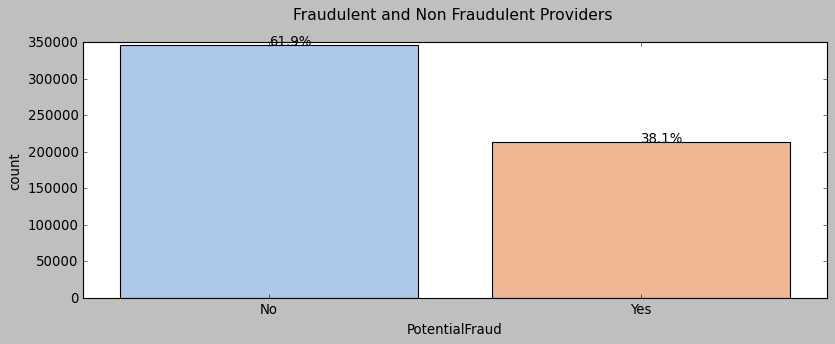

In [60]:
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='PotentialFraud',y=None, data=df_integ, orient ="v",order = df_integ['PotentialFraud'].value_counts().index, palette= 'pastel')
plt.title('Fraudulent and Non Fraudulent Providers \n', size = 14)
annotation_without_hue(ax, df_integ.PotentialFraud)
plt.show()

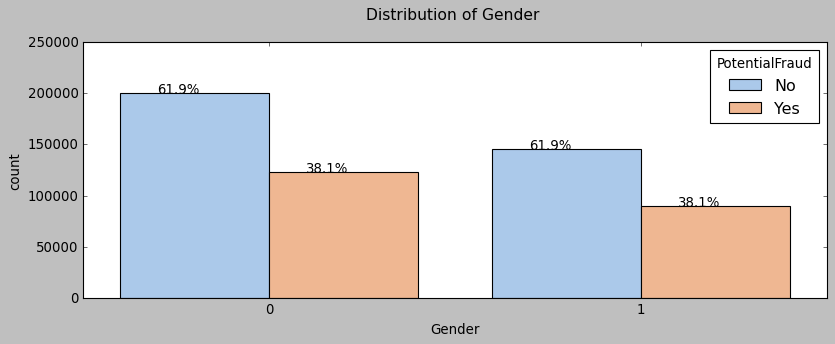

In [61]:
# Fraud and Non-fraud in the istribution of Gender
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='Gender',y=None, data=df_integ, hue="PotentialFraud",hue_order=['No','Yes'], order = df_integ['Gender'].value_counts().index, palette= 'pastel')
plt.title('Distribution of Gender \n', size = 14)
annotation_with_hue(ax, df_integ['Gender'], 2,2,-0.1,0, 14)
plt.show()

#### Observation:
- The ratios of fraudulent transactions in gender groups have no difference. 

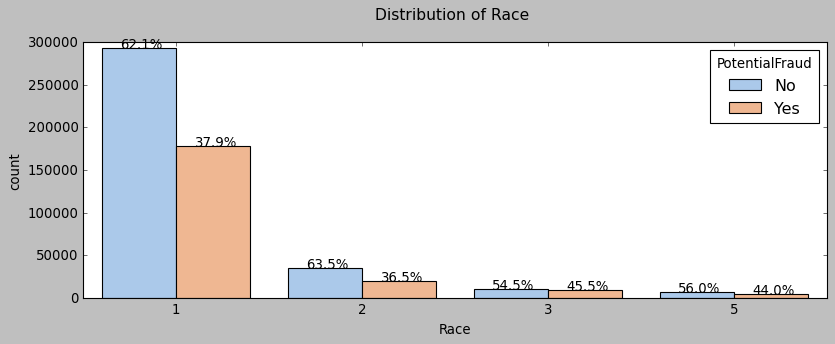

In [62]:
# Fraud and Non-fraud in the distribution of race
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='Race',y=None, data=df_integ, hue="PotentialFraud", orient ="v",hue_order=['No','Yes'], order = df_integ['Race'].value_counts().index, palette= 'pastel')
plt.title('Distribution of Race \n', size = 14)
annotation_with_hue(ax, df_integ.Race, 4,2,-0.1,0, 14)
plt.show()

#### Observation:
- The ratios of fraudulent transactions in race groups are difference. It looks like there are higher medical fraud ratios in race 3, and 5.

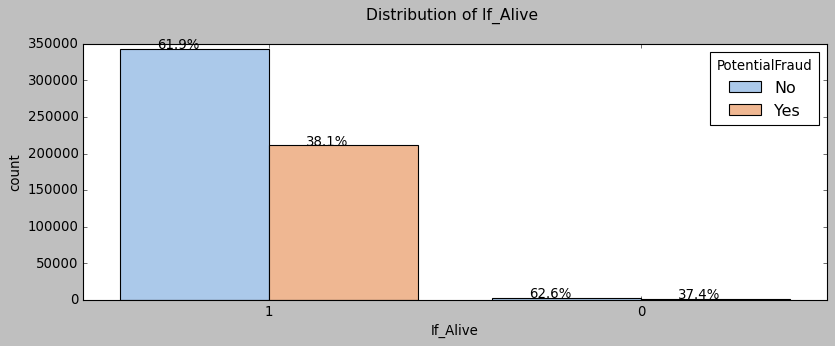

In [63]:
# Distribution of If_Alive 
plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='If_Alive',y=None, data=df_integ, hue="PotentialFraud",hue_order=['No', 'Yes'], order = df_integ['If_Alive'].value_counts().index, palette= 'pastel')
plt.title('Distribution of If_Alive \n', size = 14)
annotation_with_hue(ax, df_integ['If_Alive'], 2,2,-0.1,0, 14)
plt.show()

#### Observation:
- The ratios of fraudulent transactions in If_alive groups have no significant difference. 

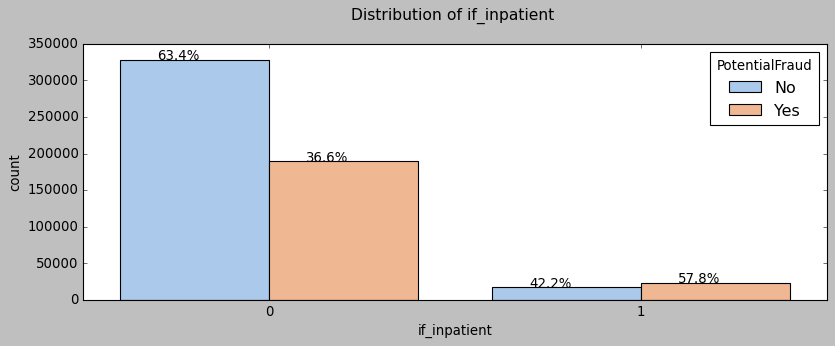

In [64]:
# Distribution of If_inpatient 

plt.figure(figsize=(12, 4))
ax =  sns.countplot(x='if_inpatient',y=None, data=df_integ, hue="PotentialFraud",hue_order=['No', 'Yes'], order = df_integ['if_inpatient'].value_counts().index, palette= 'pastel')
plt.title('Distribution of if_inpatient \n', size = 14)
annotation_with_hue(ax, df_integ['if_inpatient'], 2,2,-0.1,0, 14)
plt.show()

#### Observation:
- The ratio of fraudulent transactions in inpatients is higher than that in outpatients. Therefore, if_inpatient might be an important feature in fraud detection.  

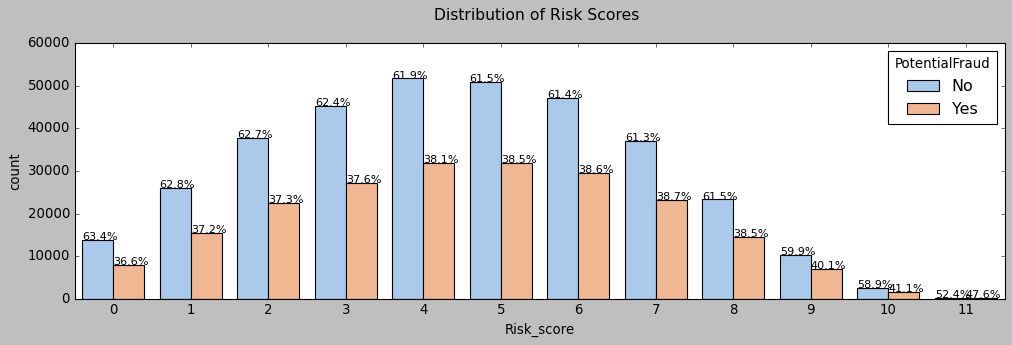

In [65]:
# Distribution of Dead_or_Alive in integrated data
plt.figure(figsize=(15, 4))
ax =  sns.countplot(x='Risk_score',y=None, data=df_integ, hue="PotentialFraud",hue_order=['No', 'Yes'],  palette= 'pastel')
plt.title('Distribution of Risk Scores \n', size = 14)
annotation_index(ax, df_integ['Risk_score'], 12,2,-0.2,0, 11)
plt.show()

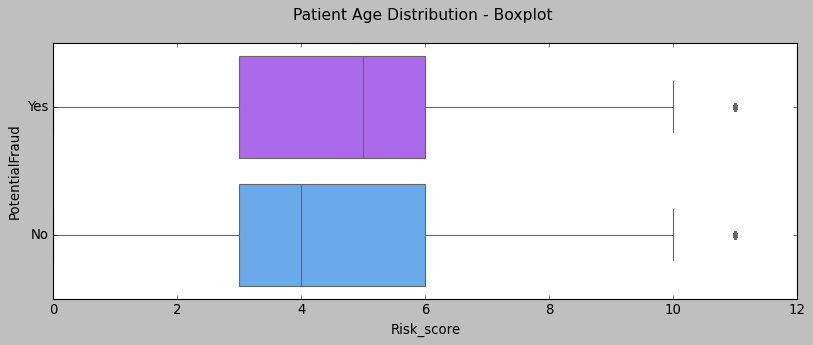

In [66]:
plt.figure(figsize = (12,4))
sns.boxplot( data=df_integ, x="Risk_score", y="PotentialFraud", palette="cool_r")
plt.title("Patient Age Distribution - Boxplot \n", fontsize = 14)
plt.show()

#### Observation:
- The beneficiaries' risk score counted in a bell shape. Fraudulent transaction rates increased as the chronic disease risk scores of beneficiaries raised. The risk mean in Fraudulent transaction was higher than that in non-Fraudulent transaction.

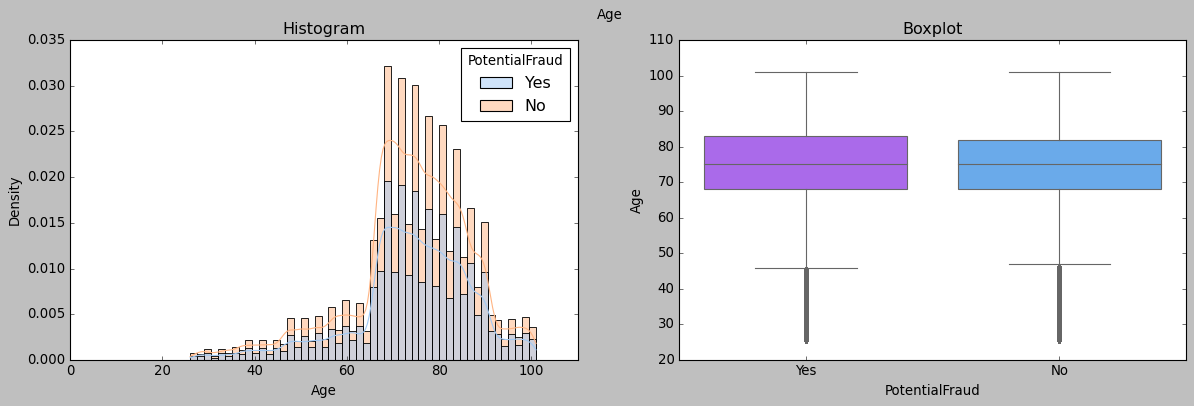

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Age')

sns.histplot(ax=axes[0], data=df_integ, x='Age',hue="PotentialFraud",kde=True, stat="density", bins=50, palette= 'pastel')
axes[0].set_title('Histogram')
axes[0].set_xlim([0, 110])
#axes[0].set_ylim([0, 0.002])

sns.boxplot(ax=axes[1], data=df_integ, y="Age", x="PotentialFraud", palette="cool_r")
axes[1].set_title('Boxplot')

plt.show()

In [68]:
print(df_integ["Age"][df_integ["PotentialFraud"]=='Yes'].describe())
print(df_integ["Age"][df_integ["PotentialFraud"]=='No'].describe())

count    212796.000000
mean         73.904049
std          13.011357
min          26.000000
25%          68.000000
50%          75.000000
75%          83.000000
max         101.000000
Name: Age, dtype: float64
count    345415.000000
mean         73.687046
std          13.028728
min          26.000000
25%          68.000000
50%          75.000000
75%          82.000000
max         101.000000
Name: Age, dtype: float64


#### Observation:
- It looks like age is not an important feature to identify Whether fraudulent or not.

<Figure size 1440x400 with 0 Axes>

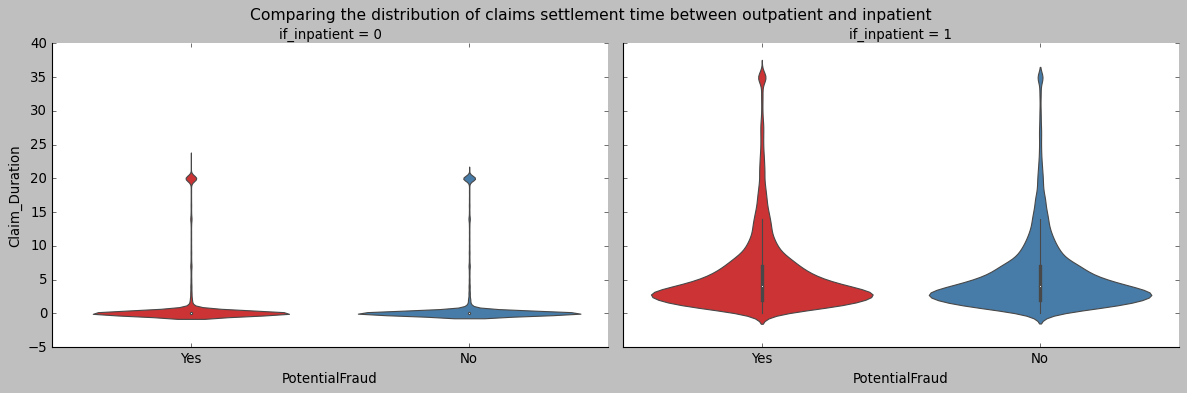

In [69]:
plt.figure(figsize = (18,5))
cat = sns.catplot(x="PotentialFraud", y="Claim_Duration", col="if_inpatient", data=df_integ, palette="Set1",
                height=5, aspect=1.5,  kind="violin")
cat.fig.subplots_adjust(top=0.89)
cat.fig.suptitle("Comparing the distribution of claims settlement time between outpatient and inpatient \n", fontsize = 14)
plt.show()

<Figure size 960x640 with 0 Axes>

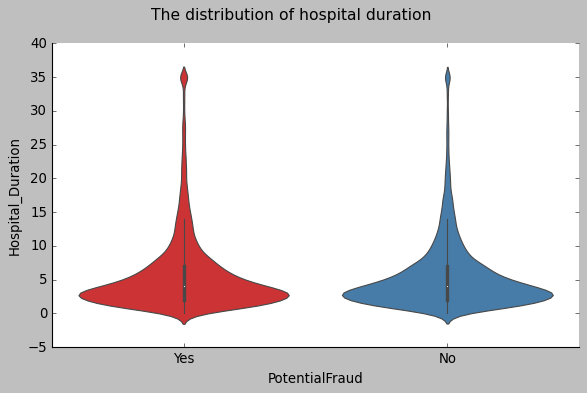

In [70]:
plt.figure(figsize = (12,8))
cat = sns.catplot(x="PotentialFraud", y="Hospital_Duration", data=df_integ[df_integ["if_inpatient"]==1], palette="Set1",
                height=5, aspect=1.5,  kind="violin")
cat.fig.suptitle("The distribution of hospital duration \n", fontsize = 14)
cat.fig.subplots_adjust(top=0.89)
plt.show()

<Figure size 1440x400 with 0 Axes>

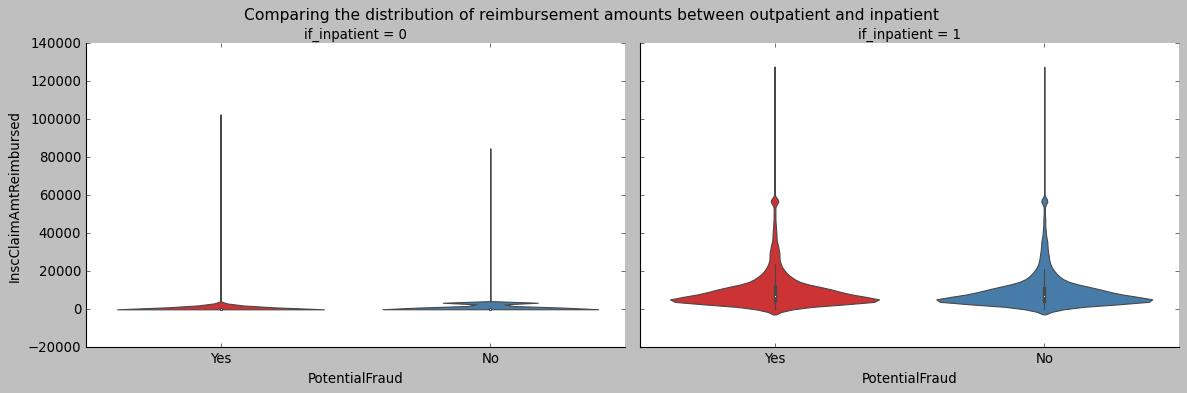

In [71]:
plt.figure(figsize = (18,5))
cat = sns.catplot(x="PotentialFraud", y="InscClaimAmtReimbursed", col="if_inpatient", data=df_integ, palette="Set1",
                height=5, aspect=1.5,  kind="violin")
cat.fig.subplots_adjust(top=0.89)
cat.fig.suptitle("Comparing the distribution of reimbursement amounts between outpatient and inpatient \n", fontsize = 14)
plt.show()

## Save integrated dataset:

In [72]:
df_integ.to_csv('Data/df_integ.csv', index= False)